Import necessary Libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
import chardet

In [8]:
with open("rounds2.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))

# check what the character encoding might be
print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


Load round 2 data

In [12]:
r2=pd.read_csv('rounds2.csv',encoding= 'ISO-8859-1')

In [13]:
r2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [9]:
round2=pd.read_csv('rounds2.csv',encoding= 'unicode_escape')

In [11]:
round2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB




```
Check the head to get overview of round 2 data
```



In [4]:
round2.head(5)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


Set data type of funded at to date time


In [5]:
round2['funded_at']=pd.to_datetime(round2['funded_at'])

In [6]:
round2.dtypes

company_permalink                  object
funding_round_permalink            object
funding_round_type                 object
funding_round_code                 object
funded_at                  datetime64[ns]
raised_amount_usd                 float64
dtype: object

Load companies data 

In [8]:
companies=pd.read_csv('companies.csv',encoding= 'unicode_escape')

Check head

In [9]:
companies.head(5)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


Number of Unique company ids /companies in roud2 data

In [10]:
round2['company_permalink'].nunique()

90247

Number of Unique company ids /companies in Companies data

In [12]:
companies['permalink'].nunique()

66368

Since the numbers doesn't match, it can be concluded that the numeber of unique companies in both dataa are not same.

In [13]:
round2.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [14]:
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

Rename "Permalink" in companies to "company_permalink" so that they can be merged. 

In [15]:
companies.rename(columns = {'permalink':'company_permalink'}, inplace = True)

Check the head

In [16]:
companies.head()

,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


The variable Round2 and Companies company_permalink column are not in same cases. Merging won't return any rows. So, make them all lower and then merge.

In [17]:
round2['company_permalink']=round2['company_permalink'].str.strip().str.lower()

In [18]:
companies['company_permalink']=companies['company_permalink'].str.strip().str.lower()

Check the heads to confirm changes are effective

In [19]:
companies.head(5)

,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [20]:
round2.head(5)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,2015-05-01,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,2014-10-14,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,2014-01-03,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,2014-01-30,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,2008-03-19,2000000.0


Join the dataframes

In [21]:
master_frame=round2.merge(companies, on='company_permalink',how='inner')

Check the head

In [22]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,2015-05-01,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,2014-10-14,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,2014-01-03,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,2014-01-30,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,2008-03-19,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


Check the shape of Data

In [23]:
master_frame.shape

(114942, 15)

In [24]:
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83803
funded_at                      0
raised_amount_usd          19984
name                           1
homepage_url                6132
category_list               3407
status                         0
country_code                8671
state_code                 10939
region                     10160
city                       10157
founded_at                 20520
dtype: int64

Find the median and create a Pivot table to find median of each funding round type. Taking median as mean can represent skewed data. Median represents the 50th percentile of data.




In [25]:
master_frame.pivot_table(values = 'raised_amount_usd', index = 'funding_round_type', aggfunc ='median')

,raised_amount_usd
funding_round_type,
angel,400000.0
convertible_note,272000.0
debt_financing,1100000.0
equity_crowdfunding,100000.0
grant,201684.0
non_equity_assistance,60000.0
post_ipo_debt,19950000.0
post_ipo_equity,12262852.5
private_equity,20000000.0


Sparkfund data between 5 to 15 million

In [26]:
masterspark=master_frame[(master_frame['raised_amount_usd']>= 5000000) &(master_frame['raised_amount_usd']<=15000000)]

In [27]:
masterspark.isnull().sum()

company_permalink             0
funding_round_permalink       0
funding_round_type            0
funding_round_code         7141
funded_at                     0
raised_amount_usd             0
name                          0
homepage_url                990
category_list               233
status                        0
country_code                811
state_code                 1083
region                     1023
city                       1021
founded_at                 3376
dtype: int64

In [28]:
masterspark.pivot_table(values = 'raised_amount_usd', index = 'funding_round_type', aggfunc ='median')

,raised_amount_usd
funding_round_type,
angel,6500000.0
convertible_note,6925436.5
debt_financing,7500000.0
equity_crowdfunding,6000000.0
grant,8100000.0
non_equity_assistance,15000000.0
post_ipo_debt,9750000.0
post_ipo_equity,9276437.5
private_equity,9469746.0


Plot a boxplot to show the how the distibution is for each funding type.

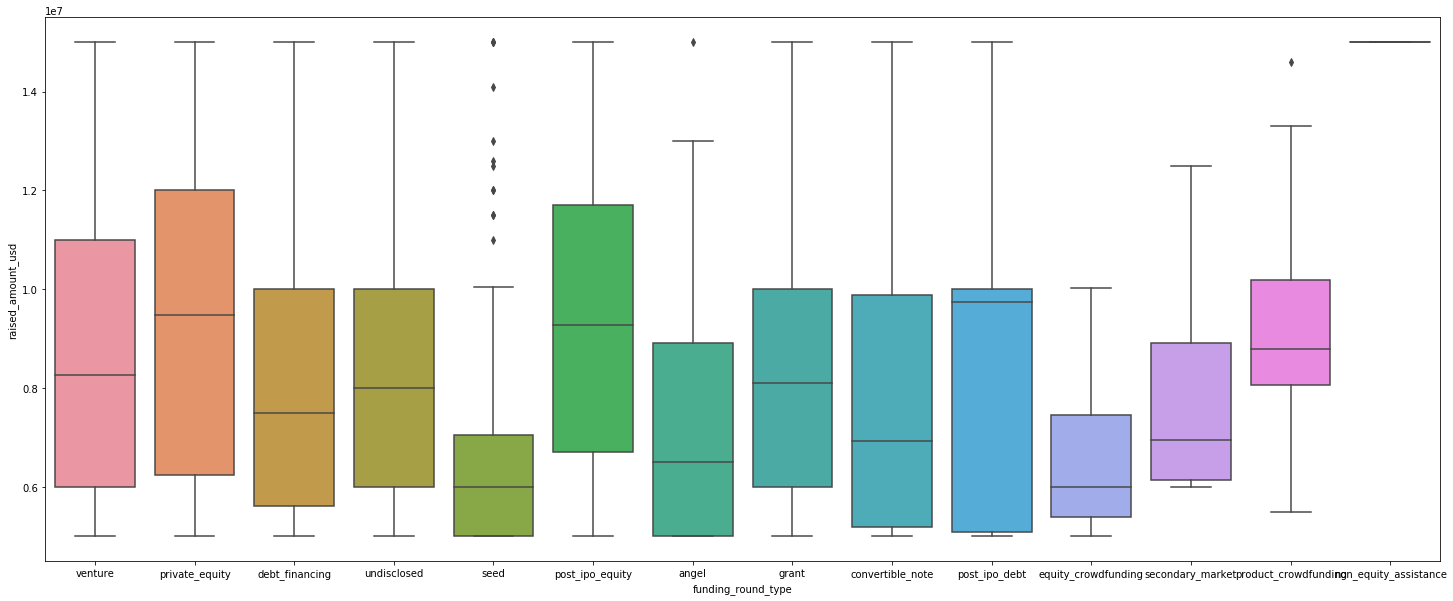

In [29]:
plt.figure(figsize=(25,10))

sns.boxplot(masterspark['funding_round_type'],masterspark['raised_amount_usd'])
plt.show()

Based on Boxplot and pivot table, it can be concluded private equity is the best investment type for spark fund




To get the data for top 9 countries in Private Equiy, we need to Group the data by countries


In [30]:
group_by_countries=master_frame[master_frame.funding_round_type=='private_equity'].groupby('country_code')

In [31]:
#save the grouped data in descending order
grouped_countries=pd.DataFrame(group_by_countries['raised_amount_usd'].sum().sort_values(ascending=False))

In [32]:
#select the first 9 rows for top 9 data and save it as dataframe
top9=pd.DataFrame(grouped_countries.iloc[0:9])

In [33]:
#reset the index of dataframe
top9.reset_index(inplace=True)

In [34]:
#check the data
top9

,country_code,raised_amount_usd
0,USA,7.622128e+10
1,CHN,2.111665e+10
2,IND,6.547512e+09
3,GBR,5.536833e+09
4,RUS,3.261000e+09
5,CAN,2.993348e+09
6,NLD,2.032735e+09
7,BRA,2.014727e+09
8,DEU,2.001233e+09


Extract Primary Category

In [35]:
#extract primary category
master_frame['primary_category']=master_frame['category_list'].str.split('|').str[0] 

In [36]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_category
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,2015-05-01,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,2014-10-14,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,Application Platforms
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,2014-01-03,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,Application Platforms
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,2014-01-30,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,Apps
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,2008-03-19,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,Curated Web


Load Mappings Data 

In [38]:
mappings=pd.read_csv('mapping.csv',encoding= 'unicode_escape')

In [39]:
mappings.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [40]:
#drop the first row
mappings.drop(0, inplace = True)

Unpivot the table

In [41]:
#unpivot using melt
mappings = pd.melt(mappings, id_vars=['category_list'])

In [42]:
#check the head
mappings.head()

,category_list,variable,value
0,3D,Automotive & Sports,0
1,3D Printing,Automotive & Sports,0
2,3D Technology,Automotive & Sports,0
3,Accounting,Automotive & Sports,0
4,Active Lifestyle,Automotive & Sports,0


Filter where value is 1

In [43]:
mappings=mappings[mappings.value==1]

In [44]:
mappings.head()

,category_list,variable,value
7,Adventure Travel,Automotive & Sports,1
13,Aerospace,Automotive & Sports,1
44,Auto,Automotive & Sports,1
45,Automated Kiosk,Automotive & Sports,1
46,Automotive,Automotive & Sports,1


Drop the value column

In [45]:
mappings.drop('value', axis = 1, inplace = True)

Rename Column in alignment with master_frame

In [46]:
mappings.rename(columns = {'category_list':'primary_category', 'variable':'main_sector'}, inplace = True)

Remove White spaces

In [47]:
mappings['primary_category']=mappings['primary_category'].str.strip()

In [48]:
master_frame['primary_category']=master_frame['primary_category'].str.strip()

Merge master_frame and mapping so that data from mappings are now shown in master_frame

In [49]:
master_frame=pd.merge(master_frame, mappings, how = 'left', on = 'primary_category')

In [50]:
master_frame.head(10)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_category,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,2015-05-01,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media,Entertainment
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,2014-10-14,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,Application Platforms,"News, Search and Messaging"
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,2014-01-03,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,Application Platforms,"News, Search and Messaging"
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,2014-01-30,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,Apps,"News, Search and Messaging"
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,2008-03-19,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,Curated Web,"News, Search and Messaging"
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,2014-07-24,NaN,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,Software,Others
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,2014-01-07,41250.0,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN,Games,Entertainment
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,2009-11-09,43360.0,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,Biotechnology,Cleantech / Semiconductors
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,2009-12-21,719491.0,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,Biotechnology,Cleantech / Semiconductors
9,/organization/0xdata,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,2013-05-22,3000000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics,NaN


Filtering the data for sparkfund based on the below conditions:


1.   Amount invested is between 5 million to 15 million
2.   Top 3 English Speaking countries



In [51]:
sparkfund=master_frame[(master_frame['raised_amount_usd']>= 5000000) & (master_frame['raised_amount_usd']<=15000000) & ((master_frame['country_code'] == 'USA')
                            | (master_frame['country_code'] == 'GBR')
                            | (master_frame['country_code'] == 'IND'))]

In [52]:
#check the head
sparkfund.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_category,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,2015-05-01,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media,Entertainment
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,2014-07-19,8900000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics,NaN
21,/organization/1-800-publicrelations-inc-,/funding-round/11c228f58831bc7ed337ef69ecc560c2,private_equity,NaN,2015-01-02,6000000.0,"1-800-PublicRelations, Inc.",http://www.1800publicrelations.com,Internet Marketing|Media|Public Relations,operating,USA,NY,New York City,New York,24-10-2013,Internet Marketing,"Social, Finance, Analytics, Advertising"
22,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,2015-03-17,5000000.0,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,Apps,"News, Search and Messaging"
103,/organization/128-technology,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,NaN,2014-12-16,11999347.0,128 Technology,http://www.128technology.com/,Service Providers|Technology,operating,USA,MA,Boston,Burlington,07-07-2014,Service Providers,Others


In [53]:
#check null values
sparkfund.isnull().sum()

company_permalink             0
funding_round_permalink       0
funding_round_type            0
funding_round_code         5619
funded_at                     0
raised_amount_usd             0
name                          0
homepage_url                697
category_list               118
status                        0
country_code                  0
state_code                   21
region                       51
city                         51
founded_at                 2240
primary_category            118
main_sector                1240
dtype: int64

Remove rows having main_sector as null

In [54]:
sparkfund = sparkfund[~(sparkfund.main_sector.isnull())]

In [55]:
sparkfund.isnull().sum()

company_permalink             0
funding_round_permalink       0
funding_round_type            0
funding_round_code         5212
funded_at                     0
raised_amount_usd             0
name                          0
homepage_url                636
category_list                 0
status                        0
country_code                  0
state_code                   20
region                       48
city                         48
founded_at                 2055
primary_category              0
main_sector                   0
dtype: int64

Create 3 dataframes D1,D2,D3 for Top 3 English Speaking Countries i.e. USA,IND,GBR

In [56]:
D1=sparkfund[sparkfund['country_code']=="USA"]

In [57]:
D2=sparkfund[sparkfund['country_code']=="IND"]

In [58]:
D3=sparkfund[sparkfund['country_code']=="GBR"]

In [59]:
#Total number of investments (count)
print(D1.raised_amount_usd.count())
print(D2.raised_amount_usd.count())
print(D3.raised_amount_usd.count())

12668
313
701


In [60]:
#Total amount of investment (USD)
print(D1.raised_amount_usd.sum())
print(D2.raised_amount_usd.sum())
print(D3.raised_amount_usd.sum())

112378342309.0
2788256313.0
6060073536.0


Sector Wise Analysis for C1=USA


In [61]:
#dataframe for countwise data
D1_Count=pd.DataFrame(D1[['main_sector','raised_amount_usd']].groupby('main_sector').count().sort_values(by='raised_amount_usd',ascending=False))

In [62]:
#reset index
D1_Count.reset_index(inplace=True)

In [63]:
#check the head
D1_Count.head(3)

,main_sector,raised_amount_usd
0,Others,3267
1,Cleantech / Semiconductors,2792
2,"Social, Finance, Analytics, Advertising",2086


Select Data for Top2 Sectors

In [64]:
D1_company1=D1[D1['main_sector']=='Others']
D1_company2=D1[D1['main_sector']=='Cleantech / Semiconductors']

In [65]:
#top company in 1st sector
D1_company1[['company_permalink','raised_amount_usd']].groupby('company_permalink').sum().sort_values(by='raised_amount_usd',ascending=False).head(1)

,raised_amount_usd
company_permalink,
/organization/emory-university,81500000.0


In [66]:
#top company in 2nd sector
D1_company2[['company_permalink','raised_amount_usd']].groupby('company_permalink').sum().sort_values(by='raised_amount_usd',ascending=False).head(1)

,raised_amount_usd
company_permalink,
/organization/biodesix,75300000.0


In [97]:
#Check Company Names from permalink derived from abocve code
print(D1[D1['company_permalink']=='/organization/emory-university'].name.head(1))

31410    Emory University
Name: name, dtype: object


In [98]:
print(D1[D1['company_permalink']=='/organization/biodesix'].name.head(1))

12189    Biodesix
Name: name, dtype: object


Sector Wise Analysis for C2=IND

In [68]:
#dataframe for countwise data

D2_Count=pd.DataFrame(D2[['main_sector','raised_amount_usd']].groupby('main_sector').count().sort_values(by='raised_amount_usd',ascending=False))
D2_Count.reset_index(inplace=True)
D2_Count.head(3)

,main_sector,raised_amount_usd
0,Others,115
1,"News, Search and Messaging",53
2,"Social, Finance, Analytics, Advertising",35


In [69]:
#Select Data for Top2 Sectors
D2_company1=D2[D2['main_sector']=='Others']
D2_company2=D2[D2['main_sector']=='News, Search and Messaging']

In [70]:
#top company in 1st sector
D2_company1[['company_permalink','raised_amount_usd']].groupby('company_permalink').sum().sort_values(by='raised_amount_usd',ascending=False).head(1)

,raised_amount_usd
company_permalink,
/organization/firstcry-com,39000000.0


In [71]:
#top company in 2nd sector

D2_company2[['company_permalink','raised_amount_usd']].groupby('company_permalink').sum().sort_values(by='raised_amount_usd',ascending=False).head(1)

,raised_amount_usd
company_permalink,
/organization/gupshup-technology-india-pvt-ltd,33000000.0


In [72]:
#company names
print(D2[D2['company_permalink']=='/organization/firstcry-com'].name.head(1))
print(D2[D2['company_permalink']=='/organization/gupshup-technology-india-pvt-ltd'].name.head(1))

35821    FirstCry.com
Name: name, dtype: object
42473    GupShup
Name: name, dtype: object


Sector Wise Analysis for C3=GBR

In [73]:
#dataframe for countwise data

D3_Count=pd.DataFrame(D3[['main_sector','raised_amount_usd']].groupby('main_sector').count().sort_values(by='raised_amount_usd',ascending=False))
D3_Count.reset_index(inplace=True)
D3_Count.head(3)

,main_sector,raised_amount_usd
0,Others,168
1,Cleantech / Semiconductors,161
2,"Social, Finance, Analytics, Advertising",109


In [74]:
#Select Data for Top2 Sectors

D3_company1=D3[D3['main_sector']=='Others']
D3_company2=D3[D3['main_sector']=='Cleantech / Semiconductors']

In [75]:
#top company in 1st sector

D3_company1[['company_permalink','raised_amount_usd']].groupby('company_permalink').sum().sort_values(by='raised_amount_usd',ascending=False).head(1)

,raised_amount_usd
company_permalink,
/organization/ip-access,39683329.0


In [76]:
#top company in 2nd sector

D3_company2[['company_permalink','raised_amount_usd']].groupby('company_permalink').sum().sort_values(by='raised_amount_usd',ascending=False).head(1)

,raised_amount_usd
company_permalink,
/organization/eusa-pharma,35600000.0


In [77]:
#name of companies
print(D3[D3['company_permalink']=='/organization/ip-access'].name.head(1))
print(D3[D3['company_permalink']=='/organization/eusa-pharma'].name.head(1))

49817    ip.access
Name: name, dtype: object
33169    EUSA Pharma
Name: name, dtype: object


Box Plot of Raised amount for different funding round types to get the representative amount of investment

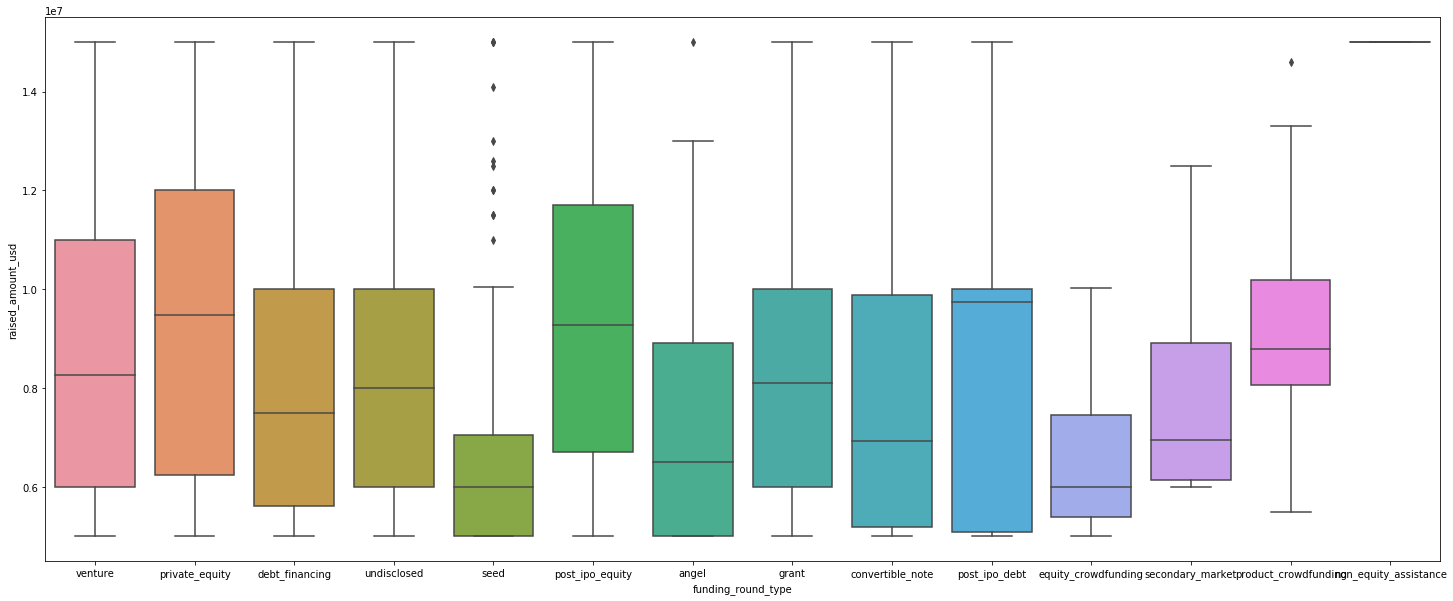

In [102]:
plt.figure(figsize=(25,10))
sns.boxplot(masterspark['funding_round_type'],masterspark['raised_amount_usd'])
plt.savefig('boxplot.png')
plt.show()


From the above plot it can be seen that investment for private equite is well distributed. The 25th Percentile to 75th Percentile data is between 7 to 12/13 million. 50th Percentile is around 9 million. Since Sparkfund wants to invest between 5 to 15 million, Private Equity is the best sector to invest 

In [79]:
#check top9 dataframe
top9

,country_code,raised_amount_usd
0,USA,7.622128e+10
1,CHN,2.111665e+10
2,IND,6.547512e+09
3,GBR,5.536833e+09
4,RUS,3.261000e+09
5,CAN,2.993348e+09
6,NLD,2.032735e+09
7,BRA,2.014727e+09
8,DEU,2.001233e+09


Barplot to show amount raised in top 9 countries. It also includes top 3 English speaking countries.

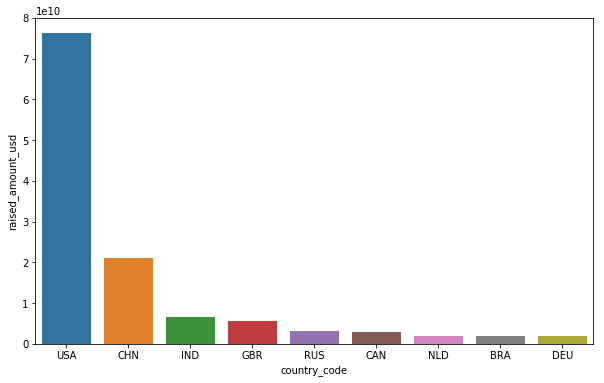

In [103]:
plt.figure(figsize=(10,6))
sns.barplot(data=top9, x="country_code", y="raised_amount_usd")
plt.savefig('top.png')
plt.show()

Plot number of investments in the top 3 sectors of the top 3 countries

In [81]:
#Top 3 sectors in country 1
D1_Top3=D1_Count.head(3)

In [82]:
#Add Country Name
D1_Top3['Country']='USA'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [83]:
#check the data
D1_Top3

,main_sector,raised_amount_usd,Country
0,Others,3267,USA
1,Cleantech / Semiconductors,2792,USA
2,"Social, Finance, Analytics, Advertising",2086,USA


In [84]:
#Top 3 sectors in country 2
D2_Top3=D2_Count.head(3)

In [85]:
#Add Country 2
D2_Top3['Country']='IND'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [86]:
#Check the data
D2_Top3

,main_sector,raised_amount_usd,Country
0,Others,115,IND
1,"News, Search and Messaging",53,IND
2,"Social, Finance, Analytics, Advertising",35,IND


In [87]:
#Top 3 sectors in country 3
D3_Top3=D3_Count.head(3)

In [88]:
#add country Name
D3_Top3['Country']='GBR'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [89]:
#check the data
D3_Top3

,main_sector,raised_amount_usd,Country
0,Others,168,GBR
1,Cleantech / Semiconductors,161,GBR
2,"Social, Finance, Analytics, Advertising",109,GBR


In [90]:
#concatenate all the 3 dataframe in a single dataframe
Count_Top3=pd.concat([D1_Top3, D2_Top3,D3_Top3], axis = 0)

In [91]:
#reset the index
Count_Top3.reset_index(inplace=True)

In [92]:
#drop column named index from new dataframe
Count_Top3.drop('index',axis=1,inplace=True)

In [93]:
#rename column
Count_Top3.rename(columns={'raised_amount_usd':'Count'},inplace=True)

In [94]:
#check the dataframe
Count_Top3

,main_sector,Count,Country
0,Others,3267,USA
1,Cleantech / Semiconductors,2792,USA
2,"Social, Finance, Analytics, Advertising",2086,USA
3,Others,115,IND
4,"News, Search and Messaging",53,IND
5,"Social, Finance, Analytics, Advertising",35,IND
6,Others,168,GBR
7,Cleantech / Semiconductors,161,GBR
8,"Social, Finance, Analytics, Advertising",109,GBR


Make a box plot to show the comparison of number of investments in top 3 sectors of top3 English speaking countries. 

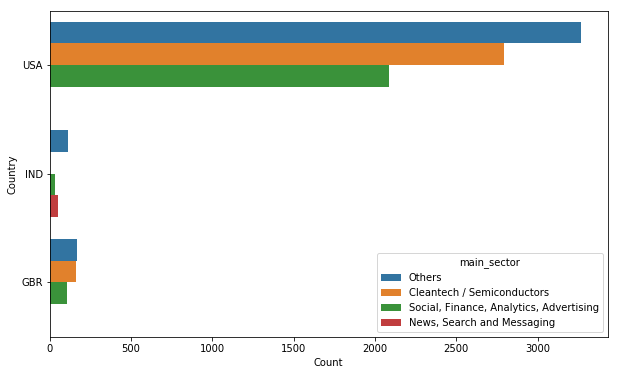

In [104]:
plt.figure(figsize=(10, 6))
sns.barplot(data=Count_Top3,y='Country', x='Count', hue="main_sector")
plt.savefig('top3.png')
plt.show()